# Cours sur les algorithmes d'inteligence Artificielle

Ce cours est inspiré de https://realpython.com/knn-python/#basics-of-machine-learning

---
---
---

## I) Initialisation et préparation des données

Avant de faire du machine learning il faut : 
* Importer les bons modules
* Récupérer des données
* Nettoyer ces données (c'est cadeau pour le moment mais on le fera plus tard)
* Les normaliser (comme on compare des nombres il ne faut pas que l'un prenne le pas sur l'autre)

C'est ce que l'on va faire maintenant

---
---

### I.1) Importation des premiers modules
* pandas pour utiliser des DataFrames
* on va avoir besoin de copier un dataframe donc on importe deepcopy
* Après le grand nettoyage, on fera un algorithme de KMeans qui est dans le package d'intelligence artificielle sklearn, donc on l'importe
* Comme on voudra faire des graphiques on importe matplotlib

In [2]:
import pandas as pd
from copy import deepcopy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

---
---

### I.2) Récupérer les données
Les données que l'on va regarder sont les formations parcoursup disponible sur l'opendata du gouvernement (lien à suivre). En attendant il est dans le dossier github. On crée le dataframe et on regarde ce que c'est

In [3]:
df = pd.read_csv("parcourssup2020.csv",sep = ";")

In [4]:
df

,session,contrat_etab,cod_uai,g_ea_lib_vx,dep,dep_lib,region_etab_aff,acad_mies,select_form,fili,...,lib_grp4,ran_grp4,lib_grp5,ran_grp5,taux_adm_psup,taux_adm_psup_pro,taux_adm_psup_gen,taux_adm_psup_techno,tri,cod_aff_form
0,2020,Public,0791018C,IFSI CH Niort,79,Deux-Sèvres,Nouvelle-Aquitaine,Poitiers,formation selective,IFSI,...,NaN,NaN,NaN,NaN,34.0,21.0,60.0,20.0,3_Autres formations,23215
1,2020,Public,0271476H,IFSI Evreux CHI Eure-Seine,27,Eure,Normandie,Normandie,formation selective,IFSI,...,NaN,NaN,NaN,NaN,38.0,21.0,49.0,29.0,3_Autres formations,23224
2,2020,Public,0762638E,IFSI CH Dieppe,76,Seine-Maritime,Normandie,Normandie,formation selective,IFSI,...,NaN,NaN,NaN,NaN,38.0,20.0,54.0,25.0,3_Autres formations,23226
3,2020,Public,0762642J,ERFPS CHU Rouen,76,Seine-Maritime,Normandie,Normandie,formation selective,IFSI,...,NaN,NaN,NaN,NaN,22.0,5.0,76.0,20.0,3_Autres formations,23229
4,2020,Public,0672336A,IFSI de Saverne,67,Bas-Rhin,Grand Est,Strasbourg,formation selective,IFSI,...,NaN,NaN,NaN,NaN,38.0,15.0,38.0,48.0,3_Autres formations,23238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,2020,Public,0480653Z,IFSI Lozérien,48,Lozère,Occitanie,Montpellier,formation selective,IFSI,...,NaN,NaN,NaN,NaN,20.0,13.0,54.0,33.0,3_Autres formations,23182
12756,2020,Public,0572697X,IFSI CHR Metz,57,Moselle,Grand Est,Nancy-Metz,formation selective,IFSI,...,NaN,NaN,NaN,NaN,26.0,17.0,56.0,26.0,3_Autres formations,23193
12757,2020,Public,0441623A,IFSI DE GAVY,44,Loire-Atlantique,Pays de la Loire,Nantes,formation selective,IFSI,...,NaN,NaN,NaN,NaN,21.0,32.0,46.0,22.0,3_Autres formations,23200
12758,2020,Public,0441772M,IFSI CH DE CHATEAUBRIANT,44,Loire-Atlantique,Pays de la Loire,Nantes,formation selective,IFSI,...,NaN,NaN,NaN,NaN,27.0,51.0,33.0,16.0,3_Autres formations,23201


---
> <span style="color:red"> **_Exercice_:**  </span>
>
> * Combien de lignes et de colonnes a ce dataframe ? (vous pouvez insérer une cellule python à la suite de l'exercice)
> * Autres questions ...
>
>
---



Réponse : .......................

---
---

### I.3) Nettoyer les données

On commence par faire une copie de notre dataframe, pour ne pas avoir à la réimporter si on fait une erreur (c'est une bonne méthode en général)

In [5]:
dddf = deepcopy(df)

La méthode <code> drop </code>  avec l'argument <code> axis = 1 </code> permet de supprimer des colonnes. 


---
> <span style="color:red"> **_Exercice_:**  </span>
>
> * Tester cette commande sur une autre copie de df.
> * Dans le code suivant (il vous faudra probablement faire d'autre tests ou explorer un peu df) donner le nom de toutes les colonnes supprimées :D
>
>
---

In [6]:
a = dddf.drop(df.columns[[0,2,3,5,6,7,10,12,13,14,15]],axis = 1)
liste_colonne_supp = []
for i in range(1,6):
    liste_colonne_supp.append(f"lib_grp{i}")
    liste_colonne_supp.append(f"ran_grp{i}")
a = a.drop(liste_colonne_supp+["tri","cod_aff_form"],axis = 1)
a = a.dropna(how = "all",axis = 1)

Réponse : .....................

"Si tu croyais que c'est fini, t'as tord" (Garou à Céline Dion : Sous le vent)
> * Dans le code suivant donner le nom de toutes les colonnes supprimées :D


In [7]:
df_kmeans = a.drop(a.columns[[0,2,3,4,5]],axis = 1)
df_kmeans.dropna(axis = 1,inplace = True)
df_kmeans.drop("dep",axis = 1,inplace=True)


Réponse : ...............................

---
---

### I.4 Normaliser les données

Les algorithmes d'inteligence artificielles manipulent des nombres (amazing, les maths servent à quelque chose en fait).
Donc la première étape de la normalisation est de transformer toutes les données du DataFrame en nombre.

Dans le code suivant quel va être le type des variables de <code> df_kmeans </code> ?

In [8]:
df_kmeans.astype(int)

,voe_tot,voe_tot_f,nb_voe_pp,nb_voe_pp_bg,nb_voe_pp_bg_brs,nb_voe_pp_bt,nb_voe_pp_bt_brs,nb_voe_pp_bp,nb_voe_pp_bp_brs,nb_voe_pp_at,...,acc_bp_mention,acc_aca_orig,acc_aca_orig_idf,prop_tot_bg,prop_tot_bg_brs,prop_tot_bt,prop_tot_bt_brs,prop_tot_bp,prop_tot_bp_brs,prop_tot_at
0,3717,3192,3717,720,94,769,169,329,100,1899,...,18,46,46,269,32,187,45,71,22,412
1,3153,2690,3153,571,126,614,168,319,112,1649,...,25,61,61,297,54,234,54,107,42,464
2,2851,2420,2851,539,123,555,151,251,94,1506,...,15,46,46,248,49,157,34,71,26,367
3,4346,3737,4346,951,227,839,244,398,148,2158,...,9,100,100,311,57,144,38,52,19,420
4,2444,2091,2444,442,81,515,168,225,83,1262,...,5,10,10,124,24,103,32,32,9,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,5004,4256,5004,652,128,890,274,487,173,2975,...,2,6,6,137,28,81,24,22,7,323
12756,4497,3740,4497,1004,235,883,267,513,196,2097,...,20,108,108,329,60,196,60,82,30,344
12757,4130,3607,4130,752,100,874,188,474,117,2030,...,11,23,23,150,18,42,10,65,13,157
12758,3954,3477,3954,664,89,837,187,491,121,1962,...,18,16,16,158,17,61,14,109,22,191


La réponse à la question précédente : ........................

Maintenant qu'on a un dataframe que de nombres, on peut le renormaliser. Pourquoi le renormalise-t-on ? Très bonne question !
* Expliquer ce qu'est la renormalisation pour vous (vous pouvez regarder le code suivant mais je veux plutôt savoir ce que vous pensez)
* Pourquoi a-t-on selon vous besoin de renormaliser les données ?

Réponse ......................

---
#### Petit rappel : 

Les algorithmes de clustering calculent des distances et ensuite fait des paquets. Donc la notion clé pour comprendre et utiliser ces algorithmes est la notion de distance. Quand on veut calculer la distance entre deux points $X = (x_1,x_2,\dots,x_n)$ et $Y = (y_1,y_2,\dots,y_n)$ la distance est : $$ d(X,Y) = \sqrt{(y_1 - x_1)^2 + (y_2 - x_2)^2 + \dots + (y_n - x_n)^2}$$ 

Donc pour faire une distance, on calcule les écarts entre les coordonnées des 2 points, (on les rends positifs), et on les additionne.


---


Que se passe-t-il si les écarts ne sont pas du même ordre de grandeur ?

Renormaliser les données signifie faire que toutes les valeurs soient entre 0 et 1. Pourquoi le fait-on ?
Les données en data science viennent de la vraie vie, et donc sont parfois dans des très grand nombres. 

Imaginez que l'on essaie de faire des catégories de route. On se donne comme information, la longueur, la vitesse moyenne et le nombre de voies. Naturellement les routes seront : les routes municipales, départementales, nationales, autoroutes, periphérique (ou rocade). L'une des catégories déterminante pour choisir le type de route est le nombre de voies. Mais l'écart maximum du nombre de voies est de 4 (des routes à 1 voie et des routes à 5 voies) alors que l'écart de longueurs dépassent très souvent le milier de mètres. Donc dans le calcul des distances, quelle donnée prendra le dessus de l'autre ? Est ce la bonne ? 


Réponse : ......

In [9]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df_kmeans = normalize(df_kmeans)

La méthode <code> drop </code>  avec l'argument <code> axis = 1 </code> permet de supprimer des colonnes. 


---
> <span style="color:red"> **_Exercice_:**  </span>
>
> * Que réalise ce code ?
> * Quelles sont les différentes étapes ?
> * D'après vous à quoi ressembleront les données à la fin ?
---

---
---
---

## II) L'algorithme de Clustering

On va utiliser le package scikit-learn pour implémenter un algorithme du kmeans

### II.1) Explication de l'algorithme kmeans et paramètres à choisir

On a vu un algorithme des k plus proches voisins, où l'algorithme calculait la distance d'un nouveau point à tous les points déjà en place, et mettait comme étiquette l'étiquette de la majorité des k plus proches voisins (le nom est bien choisi)

Pour l'algorithme du kmeans c'est pareil mais en légèrement différent. On choisit un nombre de cluster final $k$ ou <code> n_cluster </code> et : 
* Initialisation : l'algorithme va prendre $k$ points au hasard parmi l'échantillon  et leur attribuer une étiquette différentes
* puis faire tourner la boucle :
  * On calcule le point moyen de tous les points de chaque étiquettes on obtient les points moyens $\mu_1$ pour l'étiquette 1, $\mu_2$ pour l'étiquette 2 etc ...
  * On prend un nouveau point parmi les points pas encore classé.
  * On calcule la distance de ce nouveau point à tous les points moyens
  * L'étiquette du nouveau point est l'étiquette du point moyen le plus proche.

---

Question : 
* Combien y a-t-il d'étiquettes dans la phase d'initialisation ?
* Combien y'a-t'il de points moyens ?
* Est ce que le point moyen se déplace durant l'algorithme ? Si oui quand se déplacent-il ?
* D'après vous quel est l'algorithme le plus rapide Knn ou kmeans ? Pourquoi ?

---

Réponse : .....


Donc pour pouvoir faire tourner un kmeans il faut choisir d'abord un nombre de cluster. Dans le code suivant <code> n_cluster = 3 </code> signifie que l'on va constituer 3 clusters.

* <code> kmeans = KMeans(n_clusters=3) </code> crée un objet qui va faire tourner l'algorithme de clustering.
* <code> kmeans.fit(df_kmeans) </code> fait tourner l'algorithme du kmeans sur les données du DataFrame <code> df_kmeans </code>
* <code> y_kmeans = kmeans.predict(df_kmeans) </code> affecte dans la variable <code>y_kmeans</code> les étiquettes de tous les points de <code> df_kmeans </code>. <b>Attention : <code>y_kmeans</code> n'est qu'une colonne, pour lui donner du sens il faut l'acoller à <code>df_kmeans</code></b> 

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_kmeans)

KMeans(n_clusters=3)

In [11]:
y_kmeans = kmeans.predict(df_kmeans)

---
---

### II.2) Erreur et choix du nombre de clusters

L'objectif d'un algorithme du kmeans est de faire des clusters dont les points ne sont pas "trop" éloignés. Pour que les clusters aient du sens, il faut que les points du cluster soient assez proche. La mesure de cette notion est l'inertie : plus l'inertie est grande plus les points à l'intérieur d'un cluster sont éloignés. 

L'objectif du datascientist est de faire le minimum de cluster avec le minimum d'inertie. Si on fait un unique cluster, on a pas fait de clustering, on a mis la même étiquette à tous le monde. Si on fait autant de cluster que de points (on a certes une inertie nulle) mais on fait surtout de <b><u> l'overfitting </u></b>. L'overfitting signifie que l'on colle tellement aux données que si on a une nouvelle donnée, on ne pourra pas dire ce qu'elle est. En plus de cela, cela nous empeche de mettre du sens sur les clusters.

Le code suivant fait tourner une boucle en faisant varier le nombre de cluster du kmeans. Ensuite on met l'inertie dans une liste appelé <code> distorsion </code>

In [42]:
distorsions = []
for k in range(1,20):
    km = KMeans(
        n_clusters = k,
        init = 'random',
        n_init = 10,
        max_iter = 300,
        tol = 10**(-4),
        random_state=0
    )
    km.fit(df_kmeans)
    distorsions.append(km.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Puis on affiche cela dans un graphe.

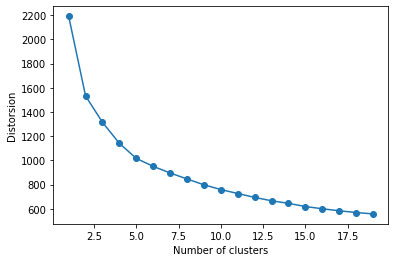

In [43]:
plt.plot(range(1,20),distorsions,marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel('Distorsion')
plt.show()

On voit qu'à partir d'un nombre de cluster de 5, l'efficacité (la distorsion) diminue moins vite. On fera donc 5 clusters

---
---

### II.3) Algorithme du kmeans et lire les résultats

On va faire tourner un algorithme du kmeans avec 5 clusters, puis on met dans <code> df_pred <code> les étiquettes (labels). On se l'affiche pour le plaisir.

In [12]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_kmeans)
y_kmeans = kmeans.predict(df_kmeans)

In [13]:
df_pred = pd.DataFrame({"label_cluster":y_kmeans})
df_pred


,label_cluster
0,4
1,4
2,4
3,4
4,0
...,...
12755,4
12756,4
12757,4
12758,4


On regarde le nombre d'occurence de chaque étiquette. "La confiance n'exclut pas le contrôle"

In [14]:
{i:list(y_kmeans).count(i) for i in set(y_kmeans)}

{0: 1784, 1: 9122, 2: 180, 3: 1407, 4: 267}

---

Que fait le code suivant ?

---

In [15]:
dff = pd.concat([df,df_pred],axis = 1)

Réponse précise : (ne pas utiliser la mot concaténer)

In [16]:
dff

,session,contrat_etab,cod_uai,g_ea_lib_vx,dep,dep_lib,region_etab_aff,acad_mies,select_form,fili,...,ran_grp4,lib_grp5,ran_grp5,taux_adm_psup,taux_adm_psup_pro,taux_adm_psup_gen,taux_adm_psup_techno,tri,cod_aff_form,label_cluster
0,2020,Public,0791018C,IFSI CH Niort,79,Deux-Sèvres,Nouvelle-Aquitaine,Poitiers,formation selective,IFSI,...,NaN,NaN,NaN,34.0,21.0,60.0,20.0,3_Autres formations,23215,4
1,2020,Public,0271476H,IFSI Evreux CHI Eure-Seine,27,Eure,Normandie,Normandie,formation selective,IFSI,...,NaN,NaN,NaN,38.0,21.0,49.0,29.0,3_Autres formations,23224,4
2,2020,Public,0762638E,IFSI CH Dieppe,76,Seine-Maritime,Normandie,Normandie,formation selective,IFSI,...,NaN,NaN,NaN,38.0,20.0,54.0,25.0,3_Autres formations,23226,4
3,2020,Public,0762642J,ERFPS CHU Rouen,76,Seine-Maritime,Normandie,Normandie,formation selective,IFSI,...,NaN,NaN,NaN,22.0,5.0,76.0,20.0,3_Autres formations,23229,4
4,2020,Public,0672336A,IFSI de Saverne,67,Bas-Rhin,Grand Est,Strasbourg,formation selective,IFSI,...,NaN,NaN,NaN,38.0,15.0,38.0,48.0,3_Autres formations,23238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,2020,Public,0480653Z,IFSI Lozérien,48,Lozère,Occitanie,Montpellier,formation selective,IFSI,...,NaN,NaN,NaN,20.0,13.0,54.0,33.0,3_Autres formations,23182,4
12756,2020,Public,0572697X,IFSI CHR Metz,57,Moselle,Grand Est,Nancy-Metz,formation selective,IFSI,...,NaN,NaN,NaN,26.0,17.0,56.0,26.0,3_Autres formations,23193,4
12757,2020,Public,0441623A,IFSI DE GAVY,44,Loire-Atlantique,Pays de la Loire,Nantes,formation selective,IFSI,...,NaN,NaN,NaN,21.0,32.0,46.0,22.0,3_Autres formations,23200,4
12758,2020,Public,0441772M,IFSI CH DE CHATEAUBRIANT,44,Loire-Atlantique,Pays de la Loire,Nantes,formation selective,IFSI,...,NaN,NaN,NaN,27.0,51.0,33.0,16.0,3_Autres formations,23201,4




---
> <span style="color:red"> **_Exercice_:**  </span>
>
> * Faire une fonction qui étant donné une DataFrame (avec les colonnes de <code>dff</code>) renvoie la formation majoritaire (dans la colonne fili), le département majoritaire, le taux d'admission parcoursup moyen, le taux d'admission parcoursup pro moyen, le taux d'admission parcoursup général moyen, le taux d'admission parcoursup techno moyen.
> * Faire une fonction qui prend en entrée un DataFrame qui sera <code> dff </code> et un entier qui sera le label du cluster que vous voulez et qui renvoie le DataFrame avec seulement les données de ce cluster
> * Combiner ces 2 fonctions en une troisième fonction pour que étant donnée un DataFrame et un label vous renvoie la formation majoritaire (dans la colonne fili), le département majoritaire, le taux d'admission parcoursup moyen, le taux d'admission parcoursup pro moyen, le taux d'admission parcoursup général moyen, le taux d'admission parcoursup techno moyen.
> * Donner un nom expliquant ce qu'il y a dans chaque cluster à chaque cluster. Si vous avez des difficultés à trouver un nom, vous pouvez enlever ou ne pas supprimer des colonnes (modifier (en gardant qd même une copie) la partie I.3). Vous pouvez aussi modifier le nombre de clusters (dans la partie II.3)

<span style="color:orange"> <big> Je n'ai pas les réponses à ces questions, mais je pense que cela vous interessera plus que moi (ce n'est que votre avenir ;)  et ce sont les vraies données de ParcourSup</big></span>

---



